In [68]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#https://www.kaggle.com/datasets/sakshisatre/the-boston-housing-dataset

In [69]:
df = pd.read_csv("Boston.csv")

In [70]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


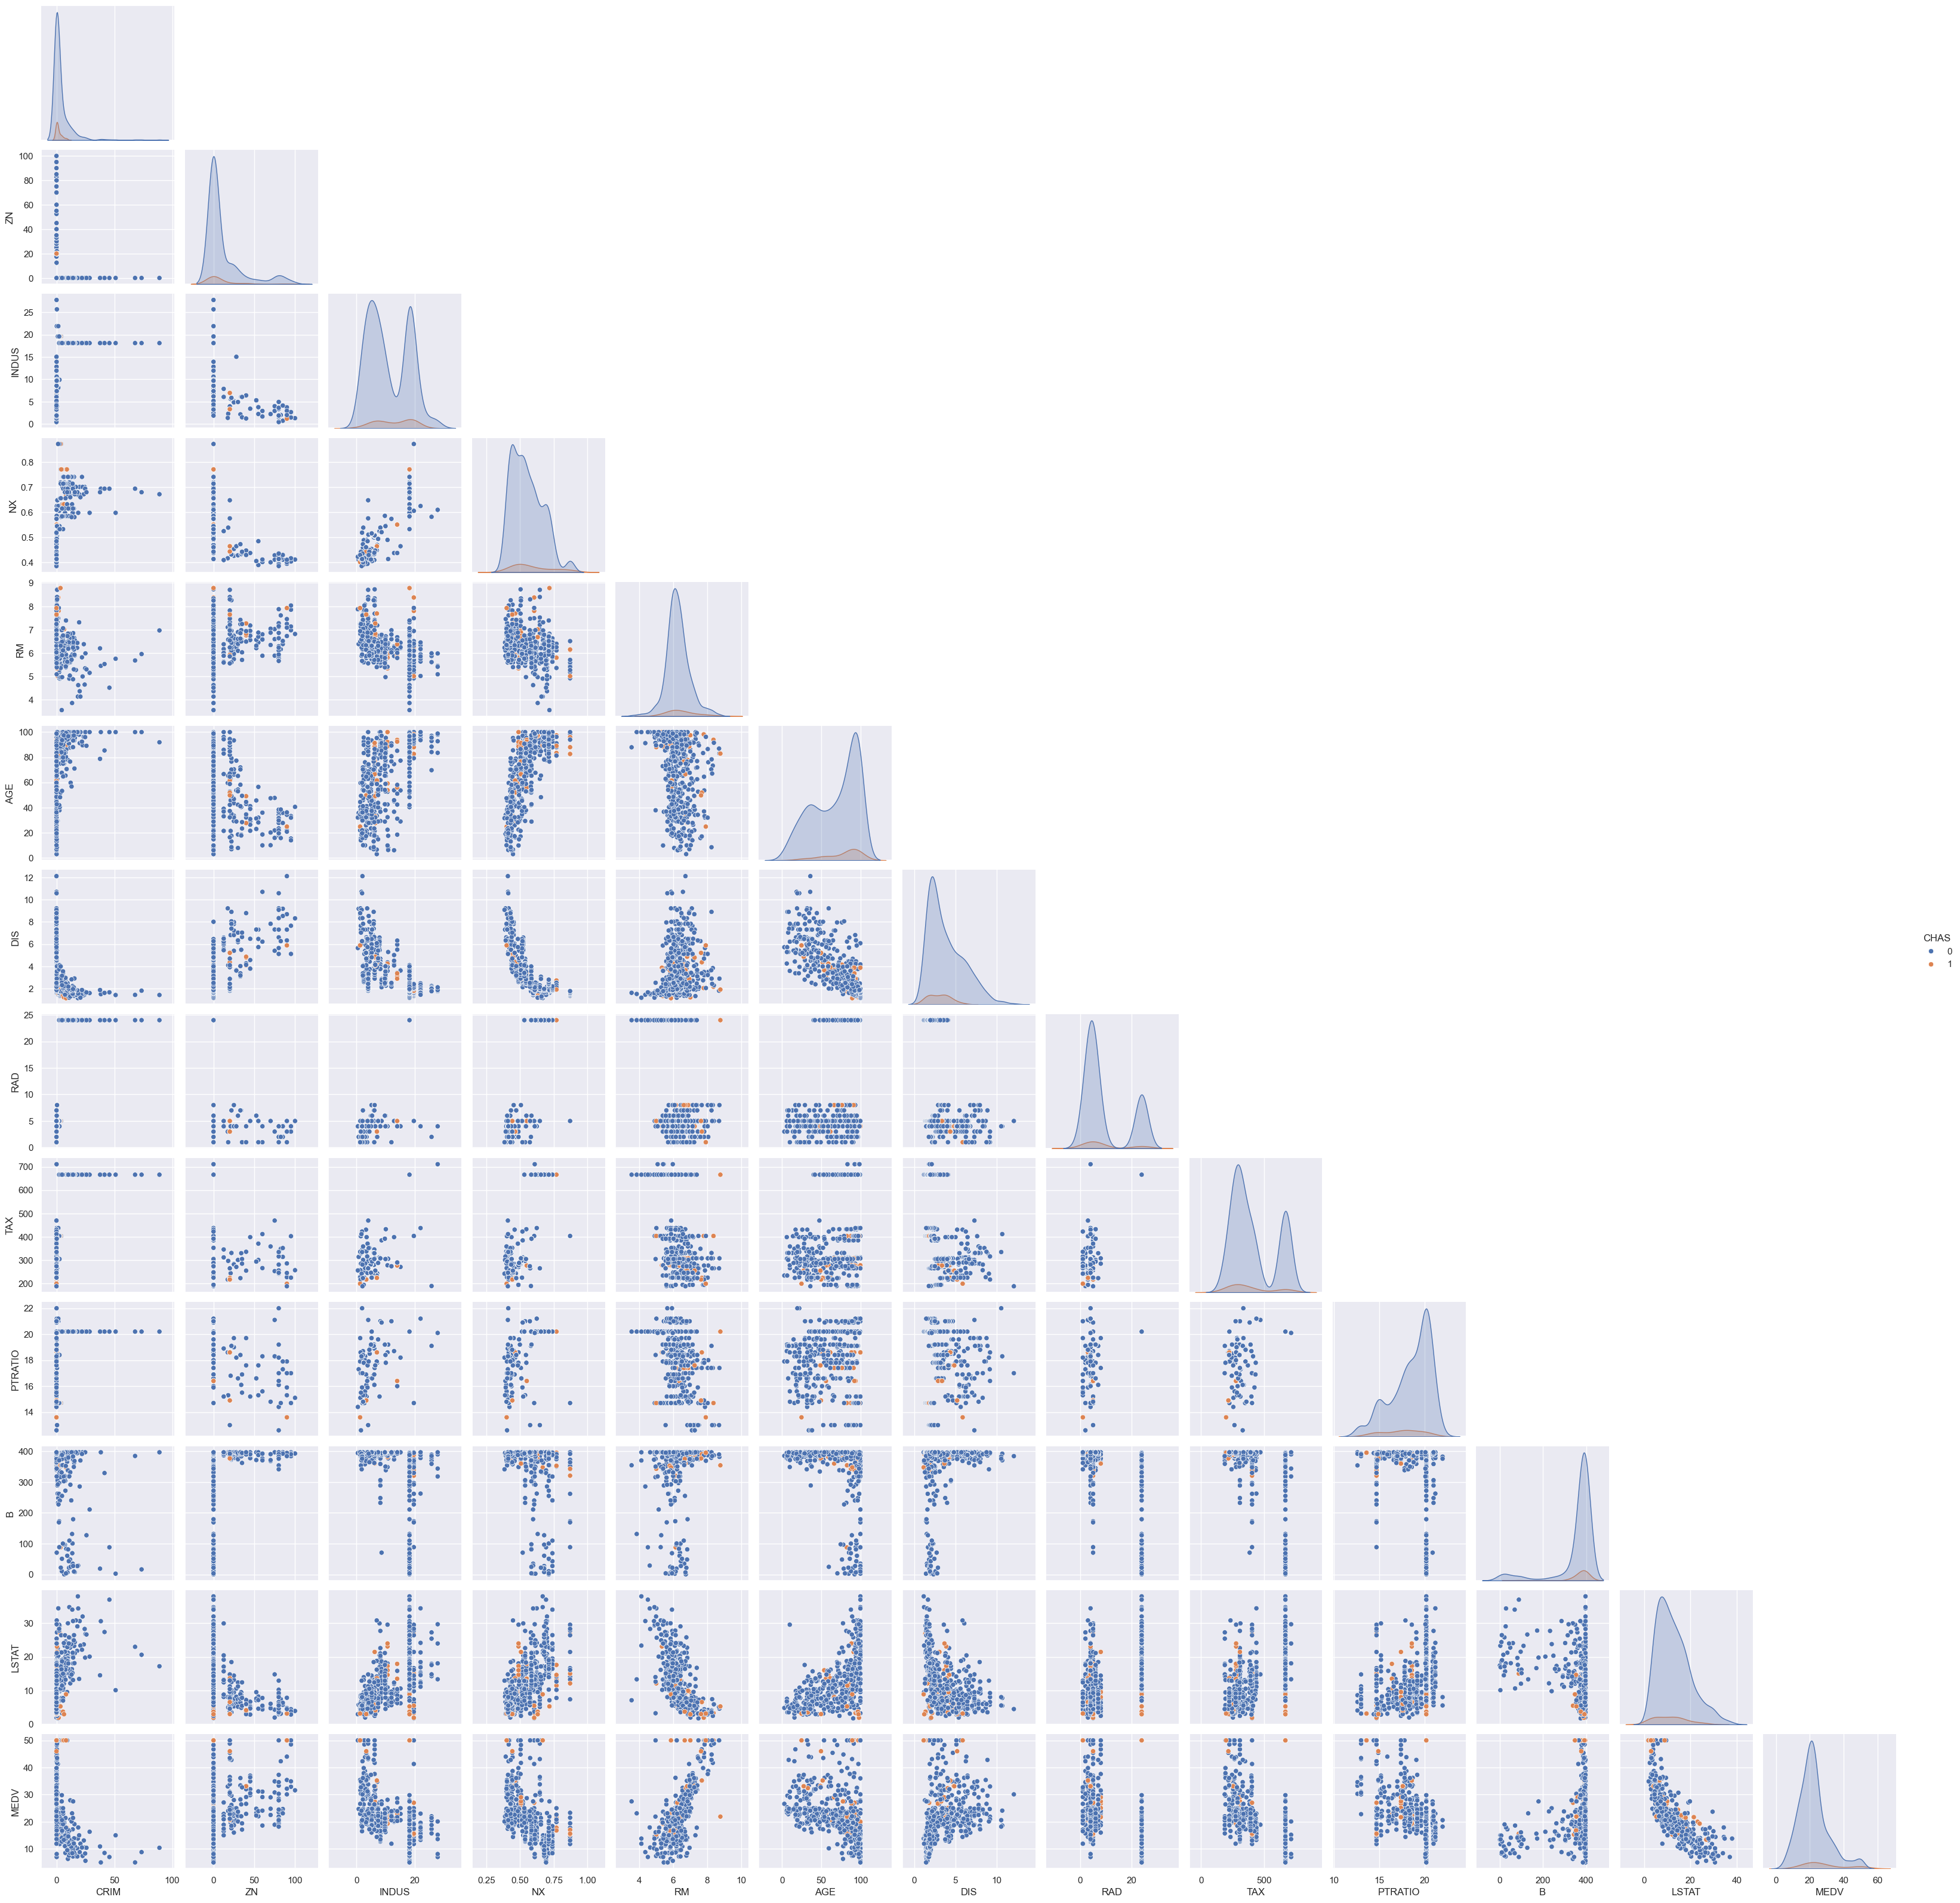

In [72]:
sns.pairplot(
    df,
    hue= "CHAS",
    corner= True
)

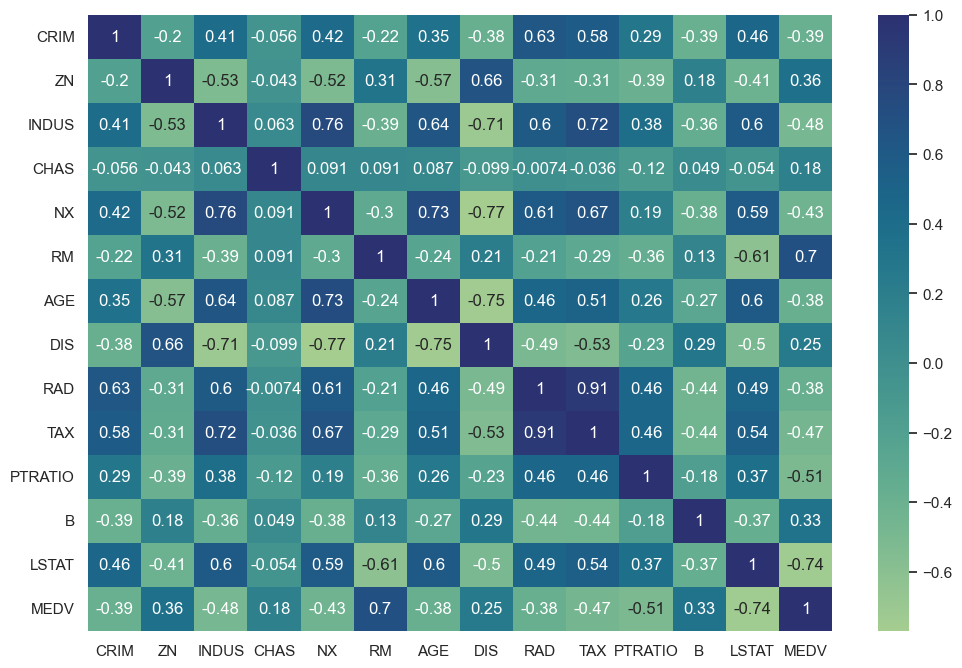

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="crest", annot=True)
plt.show()

We can drop highly correlated features, i will choose 0.6 as a threshold

In [74]:
df = df.drop(columns=["TAX", "RAD", "DIS", "INDUS", "LSTAT"])

In [75]:
X_train,X_test,y_train,y_test = train_test_split(
    df.drop(columns=["MEDV"]),
    df["MEDV"],
    train_size= 0.75,
    random_state=333
)

In [76]:
X_train

,CRIM,ZN,CHAS,NX,RM,AGE,PTRATIO,B
254,0.04819,80.0,0,0.392,6.108,32.0,16.4,392.89
301,0.03537,34.0,0,0.433,6.590,40.4,16.1,395.75
304,0.05515,33.0,0,0.472,7.236,41.1,18.4,393.68
412,18.81100,0.0,0,0.597,4.628,100.0,20.2,28.79
160,1.27346,0.0,1,0.605,6.250,92.6,14.7,338.92
...,...,...,...,...,...,...,...,...
435,11.16040,0.0,0,0.740,6.629,94.6,20.2,109.85
419,11.81230,0.0,0,0.718,6.824,76.5,20.2,48.45
461,3.69311,0.0,0,0.713,6.376,88.4,20.2,391.43
268,0.54050,20.0,0,0.575,7.470,52.6,13.0,390.30


In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
pred = model.predict(X_train)

In [79]:
dataframe = pd.DataFrame(
    {
        "actual": y_train,
        "predicted": pred
    }
)

In [80]:
dataframe

,actual,predicted
254,21.9,25.179546
301,22.0,28.467262
304,36.1,30.390400
412,17.9,4.187558
160,27.0,30.482855
...,...,...
435,13.4,18.073843
419,8.4,19.328841
461,17.7,20.161406
268,43.5,35.716840


In [81]:
model.score(X_train, y_train)

0.5989174232857526

In [82]:
mae = mean_absolute_error(y_train, pred)
mse = mean_squared_error(y_train, pred)
rmse = mean_squared_error(y_train, pred, squared=False)
r_squared = r2_score(y_train, pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)

Mean Absolute Error (MAE): 3.710170893521131
Mean Squared Error (MSE): 32.78755331738337
Root Mean Squared Error (RMSE): 5.726041679675705
R-squared (R2): 0.5989174232857526


c:\Users\matya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [83]:
pred = model.predict(X_test)

In [84]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r_squared = r2_score(y_test, pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)

Mean Absolute Error (MAE): 3.6466496599829967
Mean Squared Error (MSE): 25.02573075731453
Root Mean Squared Error (RMSE): 5.002572414000074
R-squared (R2): 0.7289636500777085


c:\Users\matya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 1.0, 'Comparison of actual vs predicted values')

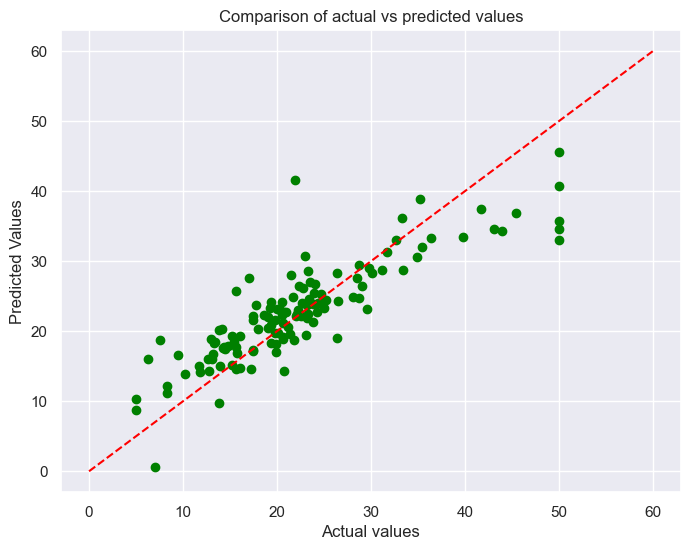

In [99]:
x = [0, 60]
y = [0,60]

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, c="green")
plt.plot(x,y, c = "red", linestyle = "--")
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.title("Comparison of actual vs predicted values")